In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = set(zip(lats, lngs))
lat_lngs

{(-7.352107664059972, 93.49891862542762),
 (12.429428720734037, 87.99251827864572),
 (18.513923883562313, -12.789566899847557),
 (-20.546946333217335, -162.29034390056492),
 (12.791613960836571, 101.40508723009378),
 (-75.86612277538941, 65.1132957766668),
 (11.990245721931558, -110.00359144944294),
 (-50.65142522104041, 65.92345106179218),
 (53.42080992355173, -48.43875282662222),
 (82.22360229073382, 176.4328154426808),
 (-9.035864553213031, 16.18776532395134),
 (20.94600148573771, 154.67030407866383),
 (79.45468730247524, -109.01069925903191),
 (36.29800987344069, 6.256740431903893),
 (-45.62488895668316, 13.298131384840872),
 (22.658140291947973, 123.56243341950352),
 (70.33285633569068, -117.83360611341382),
 (6.402006493583201, -12.154321329173342),
 (-81.64840527741873, -144.26227976706508),
 (-31.547249697263865, 98.93393801424043),
 (-47.50796066097179, 166.22455810257077),
 (85.71582189549716, 24.50004692268746),
 (-52.99565078700634, -98.51312053884125),
 (-53.60719355135985

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | atar
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | rayong
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | bonavista
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | malanje
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | constantine
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | ishigaki
Processing Record 17 of Set 1 | gandorhun
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | castro
P

Processing Record 38 of Set 4 | pitangui
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | the valley
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | chardara
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | kushnarenkovo
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | alofi
Processing Record 1 of Set 5 | mokhsogollokh
Processing Record 2 of Set 5 | praya
Processing Record 3 of Set 5 | gouyave
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | el seibo
Processing Record 6 of Set 5 | mugur-aksy
Processing Record 7 of Set 5 | auki
Processing Record 8 of Set 5 | tabuan
Processing Record 9 of Set 5 | gazli
Processing Record 10 of Set 5 | toliary
City no

Processing Record 23 of Set 8 | zyryanka
Processing Record 24 of Set 8 | margate
Processing Record 25 of Set 8 | san cristobal
Processing Record 26 of Set 8 | koygorodok
Processing Record 27 of Set 8 | madison
Processing Record 28 of Set 8 | karamken
City not found. Skipping...
Processing Record 29 of Set 8 | fenoarivo
Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | weymouth
Processing Record 32 of Set 8 | inirida
Processing Record 33 of Set 8 | tahta
Processing Record 34 of Set 8 | canyon
Processing Record 35 of Set 8 | tiarei
Processing Record 36 of Set 8 | mount pleasant
Processing Record 37 of Set 8 | uitenhage
Processing Record 38 of Set 8 | faanui
Processing Record 39 of Set 8 | urubicha
Processing Record 40 of Set 8 | crestview
Processing Record 41 of Set 8 | shitkino
Processing Record 42 of Set 8 | dingle
Processing Record 43 of Set 8 | rudesheim
Processing Record 44 of Set 8 | magadan
Processing Record 45 of Set 8 | port hardy
Processing Record 46 of S

Processing Record 8 of Set 12 | hervey bay
Processing Record 9 of Set 12 | gazanjyk
Processing Record 10 of Set 12 | soure
Processing Record 11 of Set 12 | khandyga
Processing Record 12 of Set 12 | ushtobe
Processing Record 13 of Set 12 | stephenville
Processing Record 14 of Set 12 | aklavik
Processing Record 15 of Set 12 | goderich
Processing Record 16 of Set 12 | peniche
Processing Record 17 of Set 12 | marsh harbour
Processing Record 18 of Set 12 | port-gentil
Processing Record 19 of Set 12 | hayden
Processing Record 20 of Set 12 | duzici
City not found. Skipping...
Processing Record 21 of Set 12 | camopi
Processing Record 22 of Set 12 | san policarpo
Processing Record 23 of Set 12 | fecamp
Processing Record 24 of Set 12 | jian
Processing Record 25 of Set 12 | parintins
Processing Record 26 of Set 12 | abhar
Processing Record 27 of Set 12 | mujiayingzi
Processing Record 28 of Set 12 | great bend
Processing Record 29 of Set 12 | camana
Processing Record 30 of Set 12 | forio
Processin

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,77.05,95,100,2.42,ID,2021-09-26 14:23:22
1,Port Blair,11.6667,92.7500,78.82,89,100,14.03,IN,2021-09-26 14:23:22
2,Atar,20.5169,-13.0499,105.53,10,11,9.22,MR,2021-09-26 14:23:23
3,Avarua,-21.2078,-159.7750,69.85,94,75,2.30,CK,2021-09-26 14:23:23
4,Rayong,12.8333,101.4333,80.15,99,100,0.83,TH,2021-09-26 14:23:23
5,San Patricio,28.0170,-97.5169,79.88,60,7,5.23,US,2021-09-26 14:23:24
6,Saint-Philippe,-21.3585,55.7679,73.22,83,44,14.56,RE,2021-09-26 14:23:24
7,Bonavista,48.6499,-53.1147,60.12,80,79,17.22,CA,2021-09-26 14:23:24
8,Leningradskiy,69.3833,178.4167,23.95,89,99,7.90,RU,2021-09-26 14:23:25
9,Malanje,-9.5402,16.3410,88.39,27,79,6.38,AO,2021-09-26 14:23:25


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2021-09-26 14:23:22,-0.9492,100.3543,77.05,95,100,2.42
1,Port Blair,IN,2021-09-26 14:23:22,11.6667,92.7500,78.82,89,100,14.03
2,Atar,MR,2021-09-26 14:23:23,20.5169,-13.0499,105.53,10,11,9.22
3,Avarua,CK,2021-09-26 14:23:23,-21.2078,-159.7750,69.85,94,75,2.30
4,Rayong,TH,2021-09-26 14:23:23,12.8333,101.4333,80.15,99,100,0.83
...,...,...,...,...,...,...,...,...,...
547,Dali,CN,2021-09-26 14:26:46,25.7000,100.1833,60.96,89,87,2.80
548,Sananduva,BR,2021-09-26 14:26:46,-27.9497,-51.8067,72.37,64,0,4.27
549,Mwinilunga,ZM,2021-09-26 14:26:47,-11.7358,24.4293,90.23,14,94,4.52
550,Chengde,CN,2021-09-26 14:26:47,40.9725,117.9361,61.36,97,100,0.89


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

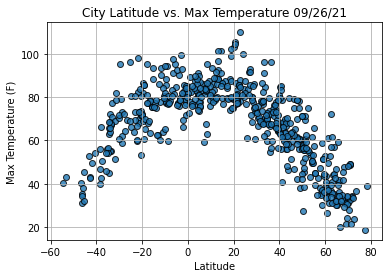

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

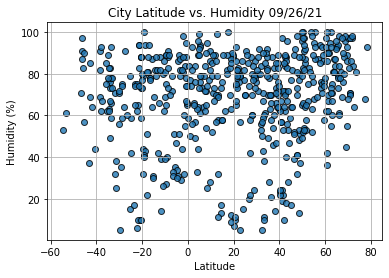

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

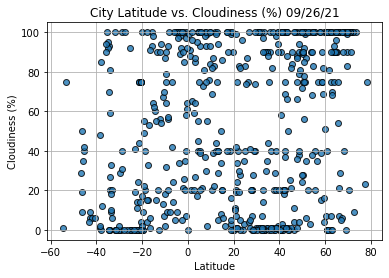

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

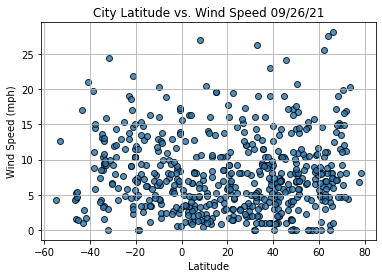

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2021-09-26 14:23:26
Lat                      -34.4187
Lng                       19.2345
Max Temp                     63.0
Humidity                       77
Cloudiness                     70
Wind Speed                   8.55
Name: 13, dtype: object

In [72]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Port Blair,IN,2021-09-26 14:23:22,11.6667,92.7500,78.82,89,100,14.03
2,Atar,MR,2021-09-26 14:23:23,20.5169,-13.0499,105.53,10,11,9.22
4,Rayong,TH,2021-09-26 14:23:23,12.8333,101.4333,80.15,99,100,0.83
5,San Patricio,US,2021-09-26 14:23:24,28.0170,-97.5169,79.88,60,7,5.23
7,Bonavista,CA,2021-09-26 14:23:24,48.6499,-53.1147,60.12,80,79,17.22


In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

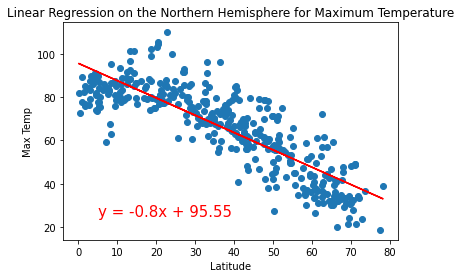

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,25))

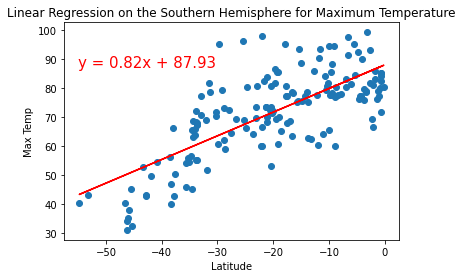

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,87))

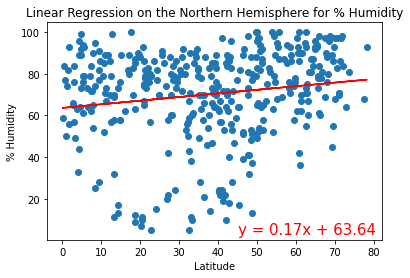

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,3))

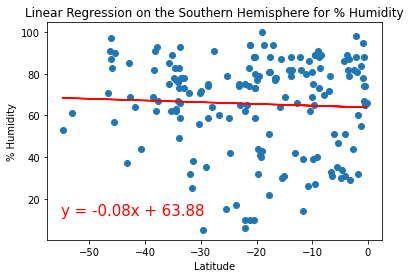

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,12))

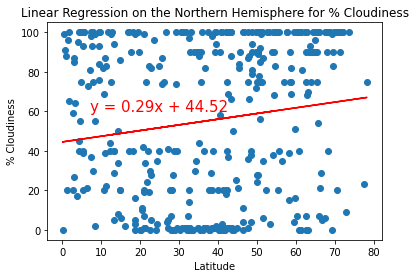

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(7,60))

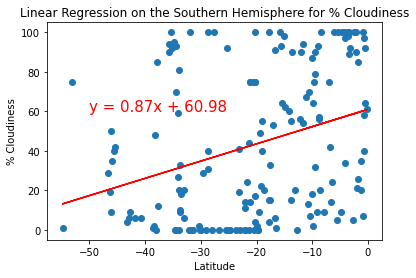

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

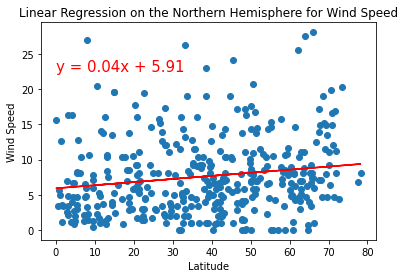

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,22.5))

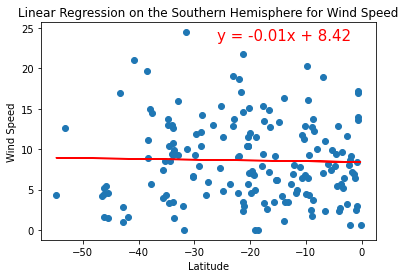

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-26,23.5))